**Gyakorlati rész - max. 60 perc**

Beadandó: a githubra feltöltött notebook linkje

- <span style="color: var(--vscode-foreground);">Az SQL feladatrészben (1-5 feladatok) tetszőlegesen választott 4 db feladatot kell megoldani, mindegyik 5 pontot ér</span>
- <span style="color: var(--vscode-foreground);">Az SQL feladatok az egyetemi szerver Szálláshely adatbázisához tartoznak, de ennek online változata is használható.</span>
- Plusz feladat megoldására 2.5 pont adható

Feladat1 - Több táblás lekérdezés + GROUP BY

Készítsen lekérdezést, amely szállásonként megadja a következő információkat:

- hány db foglalás történt
- összesen hány felnőttre foglaltak
- összesen hány gyermekre foglaltak

Csak  a szállások neve, és a három kalkuláció eredménye jelenjen meg. Hagyjuk ki azokat a szállásokat, ahol a foglalások száma 5 vagy kevesebb.

In [ ]:
SELECT szh.szallas_nev,
       COUNT(*) AS 'DB',
       SUM(f.felnott_szam),
       SUM(f.gyermek_szam)
FROM Foglalas f JOIN Szoba sz ON f.SZOBA_FK= sz.szoba_id
                JOIN Szallashely szh ON sz.szallas_fk = szh.szallas_id
GROUP BY szh.szallas_nev
HAVING COUNT(*) > 5

Feladat2 - Egy vagy többtáblás lekérdezés beágyazással

Melyek azok a szállások, ahol volt 3-nál több felnőttre való foglalás?

- csak a szállások neve jelenjen meg

In [ ]:

   SELECT DISTINCT szh.SZALLAS_NEV
   FROM Foglalas f JOIN Szoba sz ON f.SZOBA_FK = sz.SZOBA_ID
                jOIN Szallashely szh ON sz.SZALLAS_FK = szh.SZALLAS_ID
   WHERE f.FELNOTT_SZAM > 3 


Feladat3 - Analitikus fv, ablakok és partíciók

Készítesen lekérdezést, amely szálláshelyenként kumulatívan (göngyölítve) megjeleníti a foglalások összes darabszámát az időben a foglalás dátuma szerinti sorrendben!

In [ ]:
SELECT szh.SZALLAS_NEV,
       f.METTOL,
       COUNT(*) OVER(PARTITION BY szh.szallas_nev ORDER BY f.METTOL
               RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)
FROM Foglalas f JOIN Szoba sz ON f.szoba_fk = sz.szoba_id
                JOIN Szallashely szh ON sz.SZALLAS_FK = szh.SZALLAS_ID

Feladat4 - Group by spec. lehetőségek

Készítesen lekérdezést, amely megadja, hogy melyik évben hány vendég született!

- A lekérdezés jelenítese meg megfelelően jelölve a végösszeget is!
- Hagyjuk ki azokat a vendégeket, akik páros évben születtek!

In [ ]:
SELECT IIF(YEAR(szul_dat) IS NULL,
       'Végösszeg', CAST(YEAR(szul_dat) AS NVARCHAR(10))),
       COUNT(*) AS 'Fő'
FROM Vendeg
WHERE YEAR(szul_dat) % 2 != 0
GROUP BY ROLLUP(YEAR(szul_dat))

Feladat5 - Adatprofilozás vagy anonimizálás

Készítesen egy anonimizált Foglalás táblát, ahol az Ugyfel\_FK és a SZOBA\_FK anoním!

In [ ]:
CREATE TABLE #AnonimFOglalas
(
    foglalas_pk int PRIMARY KEY,
    ugyfel_fk nvarchar(20) MASKED WITH (FUNCTION = 'partial(1, "XXXX", 1)'),
    szoba_fk int MASKED WITH (FUNCTION = 'random(1, 1000)'),
    mettol date,
    meddig date,
    felnott_szam int,
    gyermek_szam int
)

- A NoSQL-es feladatrészben pontosan 2 feladatot kell megoldani, ebből legalább egy REDIS vagy CASSANDRA legyen
- Minden feladat 5-5 pontot ér, plusz feladat megoldására 2.5 pont adható
- A feladatokhoz tartozó platformok:
    - REDIS - RedisInsight (RedisLabs)
    - CASSANDRA - CQL Console (Datastax Astra)
    - <span style="color: var(--vscode-foreground);">MongoDB: Mongo Shell (sample_mflix adatbázis)</span>
    - <span style="color: var(--vscode-foreground);">Neo4j: Desktop vagy Sandbox (movies adatbázis)</span>

Feladat6 - REDIS alapvető adattípusok vagy relációs tábla implementálása

Hozzon létre kulcsokat úgy, hogy azok az alábbi relációs szerkezetet valósítsák meg! 

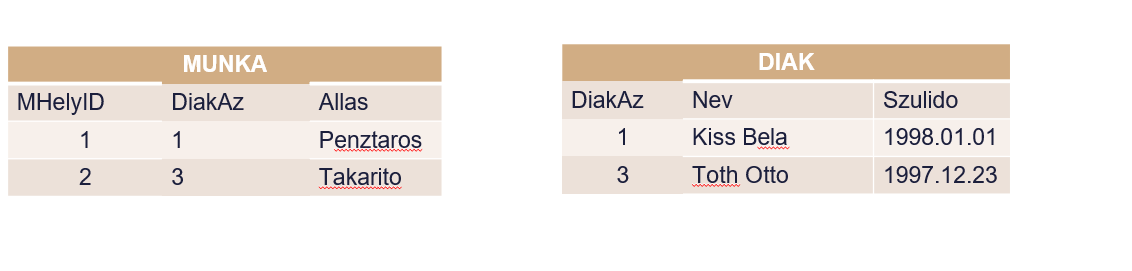

In [ ]:
HSET diak:1 nev "Kiss Bela" szulido "1998.01.01"
HSET diak:3 nev "Toth Otto" szulido "1997.12.23"
HSET munka:1:1 allas penztaros
HSET munka:2:3 allas takarito

Feladat7 - Cassandra SQL lekérdezések vagy összetett adattípusok

Valósítsa meg a következő adatszerkezetet CQL-shell utasításokkal úgy, hogy egyetlen táblában legyen minden adat!

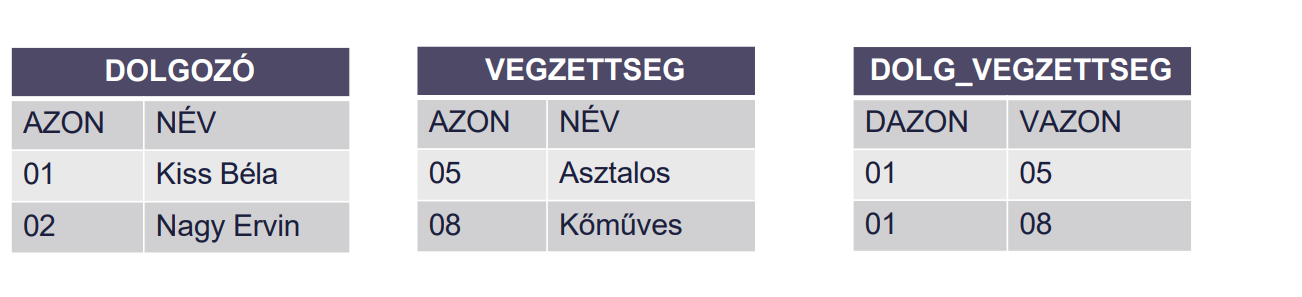

In [ ]:
CREATE TABLE dolgozo (
    azon int PRIMARY KEY,
    nev text,
    vegzettseg list<text>
);

INSERT INTO dolgozo (azon, nev, vegzettseg) 
VALUES (1, 'Kiss Bela', ['asztalos', 'komuves']);

Feladat8 - MongoDB vagy Neo4J lekérdezés

Készítsünk lekérdezést a Neo4J Movies adatbázisából, amely megfelel a következő SQL lekérdezésnek:

<span style="white-space: pre; color: var(--vscode-foreground);">SELECT p.name AS DirectorName, </span> <span style="white-space: pre; color: var(--vscode-foreground);">COUNT(m.id) AS Quantity </span> <span style="white-space: pre; color: var(--vscode-foreground);">FROM Person p </span> <span style="white-space: pre; color: var(--vscode-foreground);">JOIN Directed d ON p.id = d.person_id </span> <span style="white-space: pre; color: var(--vscode-foreground);">JOIN Movie m ON d.movie_id = m.id </span> <span style="white-space: pre; color: var(--vscode-foreground);">WHERE p.name = 'Christopher Nolan' </span> <span style="white-space: pre; color: var(--vscode-foreground);">GROUP BY p.name </span> <span style="color: var(--vscode-foreground); white-space: pre;">ORDER BY Quantity DESC;</span><span style="color: var(--vscode-foreground); background-color: rgb(13, 13, 13); white-space: pre;">;</span>

In [ ]:
match (p:Person)-[:DIRECTED]->(m:Movie)
where p.name = 'Christopher Nolan'
return p.name AS DirectorName, count(*) as Quantity
order by Quantity DESC